# Importing Data - API (US CPI data)
Source: https://www.alphavantage.co/ Inflation

In [5]:
#This API returns the annual inflation rates (consumer prices) of the United States via API

import requests

url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=MJJULQ2LBSJJVTWV'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Inflation - US Consumer Prices', 'interval': 'annual', 'unit': 'percent', 'data': [{'date': '2021-01-01', 'value': '4.69785886363739'}, {'date': '2020-01-01', 'value': '1.23358439630637'}, {'date': '2019-01-01', 'value': '1.81221007526015'}, {'date': '2018-01-01', 'value': '2.44258329692818'}, {'date': '2017-01-01', 'value': '2.13011000365963'}, {'date': '2016-01-01', 'value': '1.26158320570537'}, {'date': '2015-01-01', 'value': '0.118627135552435'}, {'date': '2014-01-01', 'value': '1.62222297740821'}, {'date': '2013-01-01', 'value': '1.46483265562714'}, {'date': '2012-01-01', 'value': '2.06933726526059'}, {'date': '2011-01-01', 'value': '3.15684156862206'}, {'date': '2010-01-01', 'value': '1.64004344238989'}, {'date': '2009-01-01', 'value': '-0.35554626629975'}, {'date': '2008-01-01', 'value': '3.83910029665101'}, {'date': '2007-01-01', 'value': '2.85267248150136'}, {'date': '2006-01-01', 'value': '3.22594410070407'}, {'date': '2005-01-01', 'value': '3.39274684549547'}, {'da

In [6]:
data.keys()

dict_keys(['name', 'interval', 'unit', 'data'])

In [8]:
import pandas as pd
df = data['data'] 
df = pd.DataFrame(df)
df

,date,value
0,2021-01-01,4.69785886363739
1,2020-01-01,1.23358439630637
2,2019-01-01,1.81221007526015
3,2018-01-01,2.44258329692818
4,2017-01-01,2.13011000365963
...,...,...
57,1964-01-01,1.27891156462583
58,1963-01-01,1.2396694214876
59,1962-01-01,1.19877334820185
60,1961-01-01,1.07072414764723


In [9]:
print(df.head())

         date             value
0  2021-01-01  4.69785886363739
1  2020-01-01  1.23358439630637
2  2019-01-01  1.81221007526015
3  2018-01-01  2.44258329692818
4  2017-01-01  2.13011000365963


In [55]:
print(df.describe())

              date             value
count           62                62
unique          62                62
top     2021-01-01  4.69785886363739
freq             1                 1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   value   62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [13]:
df['value'].astype(str).astype(float)

0     4.697859
1     1.233584
2     1.812210
3     2.442583
4     2.130110
        ...   
57    1.278912
58    1.239669
59    1.198773
60    1.070724
61    1.457976
Name: value, Length: 62, dtype: float64

In [38]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [37]:
df['value']=df['value'].astype(float)
df['date']= pd.to_datetime(df['date'])

In [41]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

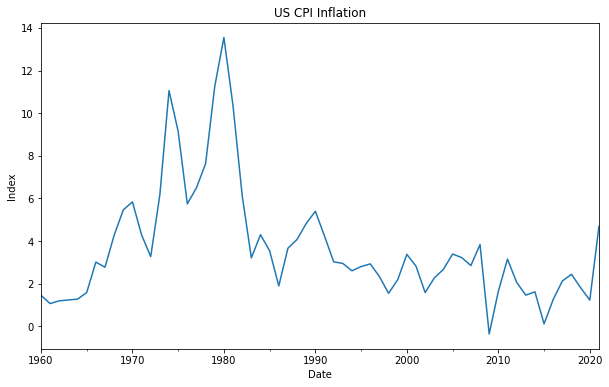

In [48]:
import matplotlib.pyplot as plt
df.plot(x = 'date', y = 'value', kind = 'line', figsize = (10,6),legend=False)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('US CPI Inflation')
plt.show()

# Importing Data - csv files (Bitcoin prices for June and July)

In [89]:
import pandas as pd
df1 = pd.read_csv('June22 daily BTC.csv')
df1.shape

(30, 7)

In [90]:
df2 = pd.read_csv('July22 daily BTC.csv')
df2.shape

(31, 7)

In [91]:
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211


In [92]:
df2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
26,27/07/2022,22986.52930,21070.80664,21244.16992,22930.54883,31758955233,22930.54883
27,28/07/2022,24110.47070,22722.26563,22933.64063,23843.88672,40212386158,23843.88672
28,29/07/2022,24294.78711,23481.17383,23845.21289,23804.63281,35887249746,23804.63281
29,30/07/2022,24572.58008,23580.50781,23796.81836,23656.20703,28148218301,23656.20703
30,31/07/2022,24121.64258,23275.70313,23652.07031,23336.89648,23553591896,23336.89648


# Join the June and July datasets into one dataframe called Prices

In [93]:
dfJune = pd.DataFrame(df1)
dfJuly = pd.DataFrame(df2)
Prices = pd.concat([df1, df2],axis = 0)

In [94]:
print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

         Volume    Adj Close  
0   41135817341  29799.08008  
1   29083562061  30467.48828  
2   26175547452  29704.39063  
3   16588370958  29832.91406  
4   

In [95]:
isinstance(Prices,pd.DataFrame)

True

In [96]:
Prices.describe()

,High,Low,Open,Close,Volume,Adj Close
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,58.000000
mean,23594.063686,22332.692816,23076.506212,22938.154650,3.035281e+10,22924.591562
std,3743.076603,3677.299782,3805.146182,3633.064549,9.888942e+09,3551.673428
min,19371.748050,17708.623050,19010.902340,19017.642580,1.639082e+10,19242.255860
25%,20913.322270,19937.791020,20547.814450,20548.246090,2.415025e+10,20557.433590
50%,21877.138670,20781.912110,21496.494140,21502.337890,2.862467e+10,21547.272460
75%,24196.818360,23009.949220,23652.070310,23389.433590,3.363101e+10,23376.299312
max,31957.285160,30020.265630,31792.554690,31370.671880,6.820456e+10,31370.671880


# Check for any missing values (9, 17 and 18 June have NaN Adj Close)

In [97]:
Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Open       61 non-null     float64
 4   Close      61 non-null     float64
 5   Volume     61 non-null     int64  
 6   Adj Close  58 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ KB


In [98]:
Prices.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    3
dtype: int64

# Filling the blanks (NaN values) with the mean of the Adj Close column

In [99]:
Prices['Adj Close'] = Prices['Adj Close'].fillna(Prices['Adj Close'].mean())

# #Passing in a list of the 3 rows which had blanks

In [107]:
Prices.iloc[[8,16,17]]

,Date,High,Low,Open,Close,Volume,Adj Close
8,09/06/2022,30609.31055,30020.26563,30215.27930,30111.99805,2.169200e+10,22924.591562
16,17/06/2022,21243.31250,20326.51953,20385.71875,20471.48242,2.713242e+10,22924.591562
17,18/06/2022,20736.04102,17708.62305,20473.42578,19017.64258,4.200944e+10,22924.591562


In [108]:
Prices.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [109]:
print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

          Volume    Adj Close  
0   4.113582e+10  29799.08008  
1   2.908356e+10  30467.48828  
2   2.617555e+10  29704.39063  
3   1.658837e+10  29832.91406  

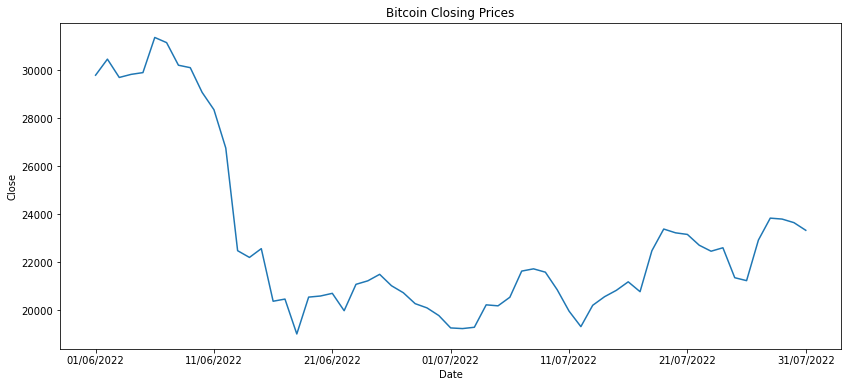

In [103]:
import matplotlib.pyplot as plt
Prices.plot(x = 'Date', y = 'Close', kind = 'line', figsize = (14,6),legend=False)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Bitcoin Closing Prices')
plt.show()

<AxesSubplot:>

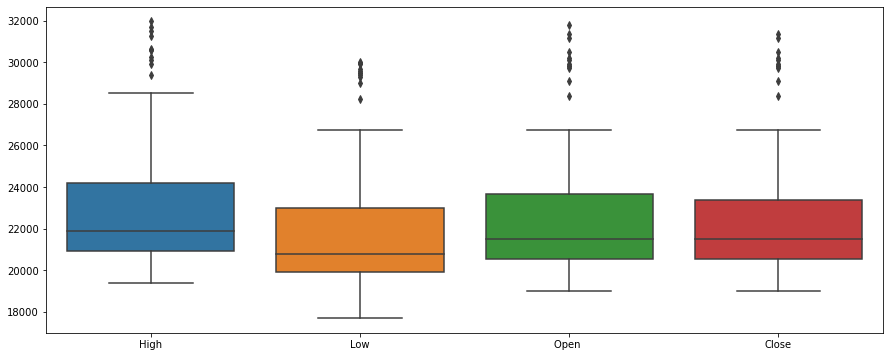

In [118]:
import seaborn as sns

Pricing_df = Prices.drop(['Volume','Adj Close'], axis=1)

plt.figure(figsize=(15, 6))
sns.boxplot(data=Pricing_df)